In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [3]:
iris = load_iris()
X = iris.data
y = iris.target

print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
dt = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    splitter="best",
    random_state=42
)

dt.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [7]:
importances = dt.feature_importances_
for name, score in zip(iris.feature_names, importances):
    print(f"{name}: {score:.4f}")

sepal length (cm): 0.0066
sepal width (cm): 0.0146
petal length (cm): 0.6720
petal width (cm): 0.3068


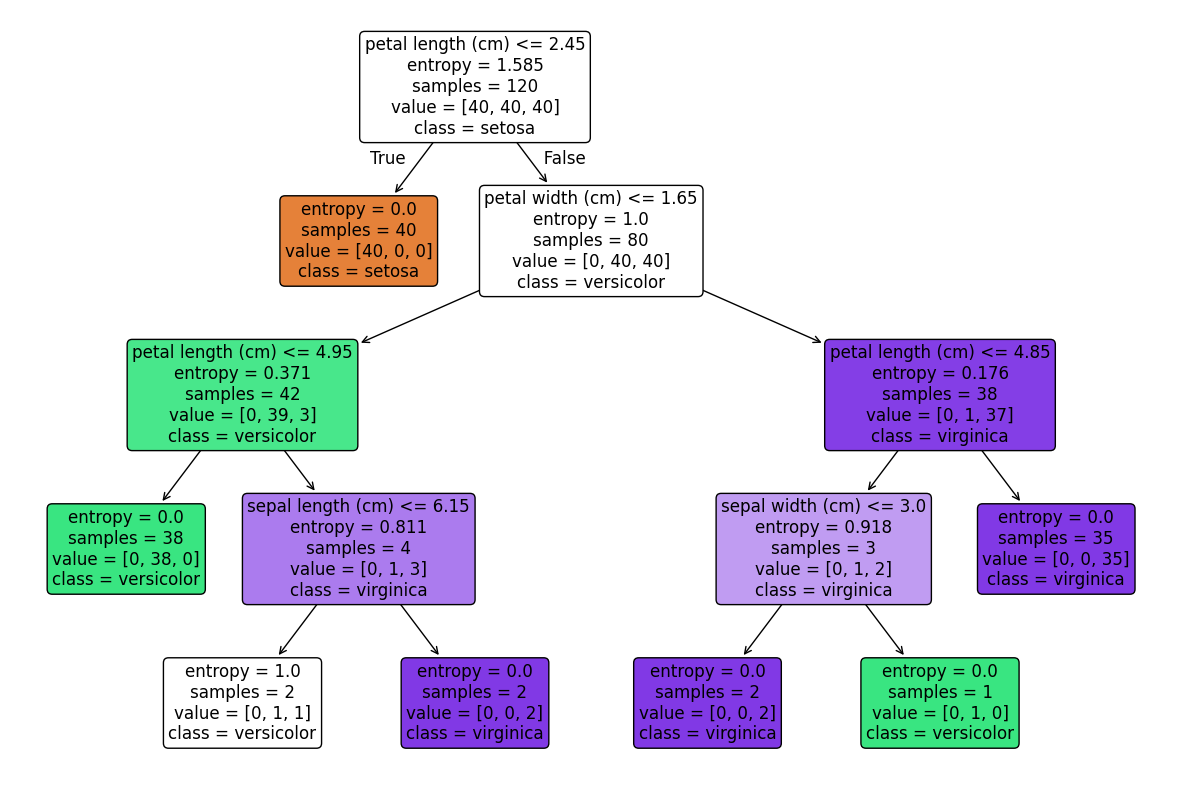

In [8]:
plt.figure(figsize=(15, 10))
plot_tree(
    dt,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.show()


In [10]:
joblib.dump(dt, "decision_tree_iris.pkl")
print("Model saved!")

Model saved!


In [11]:
loaded_dt = joblib.load("decision_tree_iris.pkl")

In [12]:
def predict_iris_decision_tree(sepal_length, sepal_width, petal_length, petal_width):
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = loaded_dt.predict(features)[0]
    return iris.target_names[prediction]

In [13]:
print(predict_iris_decision_tree(5.7, 3.1, 4.9, 2.0))

virginica


# Random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=4,
    bootstrap=True,       
    max_features="sqrt",
    oob_score=True,
    random_state=42
)

In [17]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [19]:
rf_pred = rf.predict(X_test)

In [20]:
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [21]:
print("OOB Score:", rf.oob_score_)

OOB Score: 0.9583333333333334


In [22]:
rf_imp = rf.feature_importances_
for name, score in zip(iris.feature_names, rf_imp):
    print(f"{name}: {score:.4f}")

sepal length (cm): 0.1156
sepal width (cm): 0.0108
petal length (cm): 0.4377
petal width (cm): 0.4359


In [23]:
joblib.dump(rf, "random_forest_iris.pkl")
print("Random Forest saved!")

Random Forest saved!


In [24]:
loaded_rf = joblib.load("random_forest_iris.pkl")

def predict_iris_random_forest(sepal_length, sepal_width, petal_length, petal_width):
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    pred = loaded_rf.predict(features)[0]
    return iris.target_names[pred]

# Example
print(predict_iris_random_forest(5.7, 3.1, 4.9, 2.0))


virginica
